In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("penguins.csv")
data.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
data.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [4]:
data=data.dropna()

In [5]:
data.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [7]:
data = data[data['sex'] != '.']

In [8]:
data["sex"].value_counts()

sex
MALE      169
FEMALE    165
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

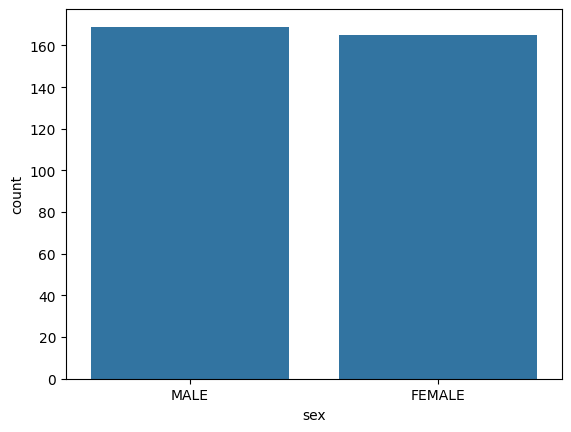

In [9]:
sns.countplot(x=data["sex"])

In [10]:
data.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [11]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
le=LabelEncoder()
ss=StandardScaler()
data["sex"]=le.fit_transform(data["sex"])

In [12]:
x=data.drop(["sex"],axis=1)
y=data["sex"]

In [13]:
from sklearn.cluster import KMeans

In [14]:
wcss=[]
clusters=range(1,10)
for i in clusters:
    model=KMeans(n_clusters=i,init="k-means++",n_init=100)
    model.fit(data[["culmen_length_mm" , "culmen_depth_mm"]])
    wcss.append(model.inertia_)

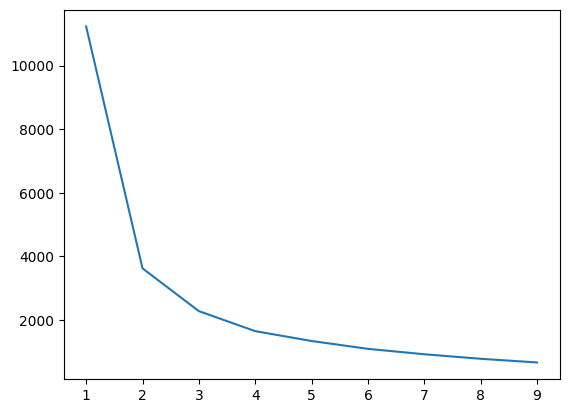

In [15]:
plt.plot(clusters,wcss)

2 and 4 clusters are the most suitale clusters for given data

In [18]:
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=0)
y=kmeans.fit_predict(x)
print(y)

[2 2 2 2 2 2 0 0 2 2 0 2 2 0 2 0 2 2 2 0 2 2 2 2 2 0 2 0 2 0 2 0 0 2 2 0 2
 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 2 2 2 0 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 0 2 0 2 0 0 0
 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2
 0 2 2 2 0 2 2 0 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 0 2 2 2 0 2 0 2 0 2 0 2 0
 2 0 0 2 2 2 2 0 2 0 2 2 2 0 2 0 2 2 2 0 2 2 0 2 2 0 2 2 0 2 0 1 0 1 1 0 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1]


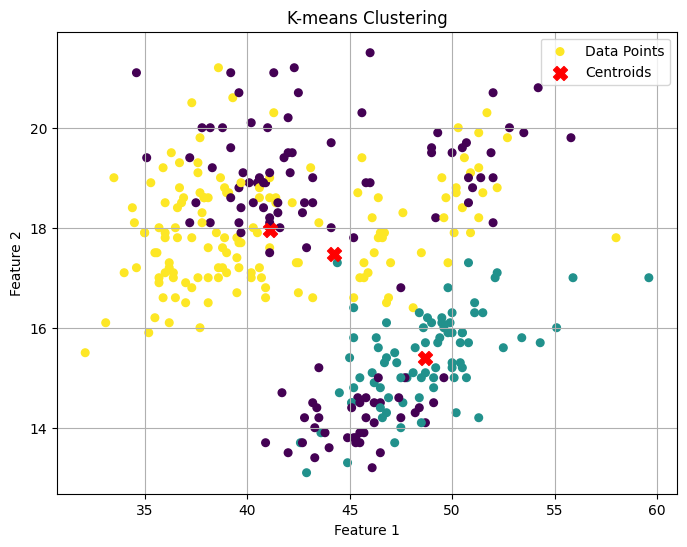

In [20]:
x_array = x.to_numpy() 

plt.figure(figsize=(8, 6))
plt.scatter(x_array[:, 0], x_array[:, 1], c=y, s=30, cmap='viridis', label='Data Points')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=100, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
